In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from matplotlib import style




df = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\SALES FORCAST DATSET.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


DATATYPES

In [115]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  540884 non-null  object
 3   Quantity     541909 non-null  object
 4   InvoiceDate  541909 non-null  object
 5   UnitPrice    541909 non-null  object
 6   CustomerID   433909 non-null  object
 7   Country      541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


SHAPE OF DATA

In [116]:
df.shape


(541909, 8)

DATA DESCRIPTION

In [117]:
df.describe(include='object').T


,count,unique,top,freq
InvoiceNo,541909,44726,573585ä,561
StockCode,541909,7805,85123A,1184
Description,540884,7956,WHITE HANGING HEART T-LIGHT HOLDER,1699
Quantity,541909,1059,1,88742
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114
UnitPrice,541909,2015,1.25,40287
CustomerID,433909,8467,&nan#,27080
Country,541909,76,United Kingdom,248303


DUPLICATED ROWS

In [118]:
df.duplicated().sum()


91

DROPPING DUPLICATES

In [119]:
df.drop_duplicates(inplace=True)


CHECKING FOR NULL ROWS

In [120]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1025
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     108000
Country             0
dtype: int64

<Axes: >

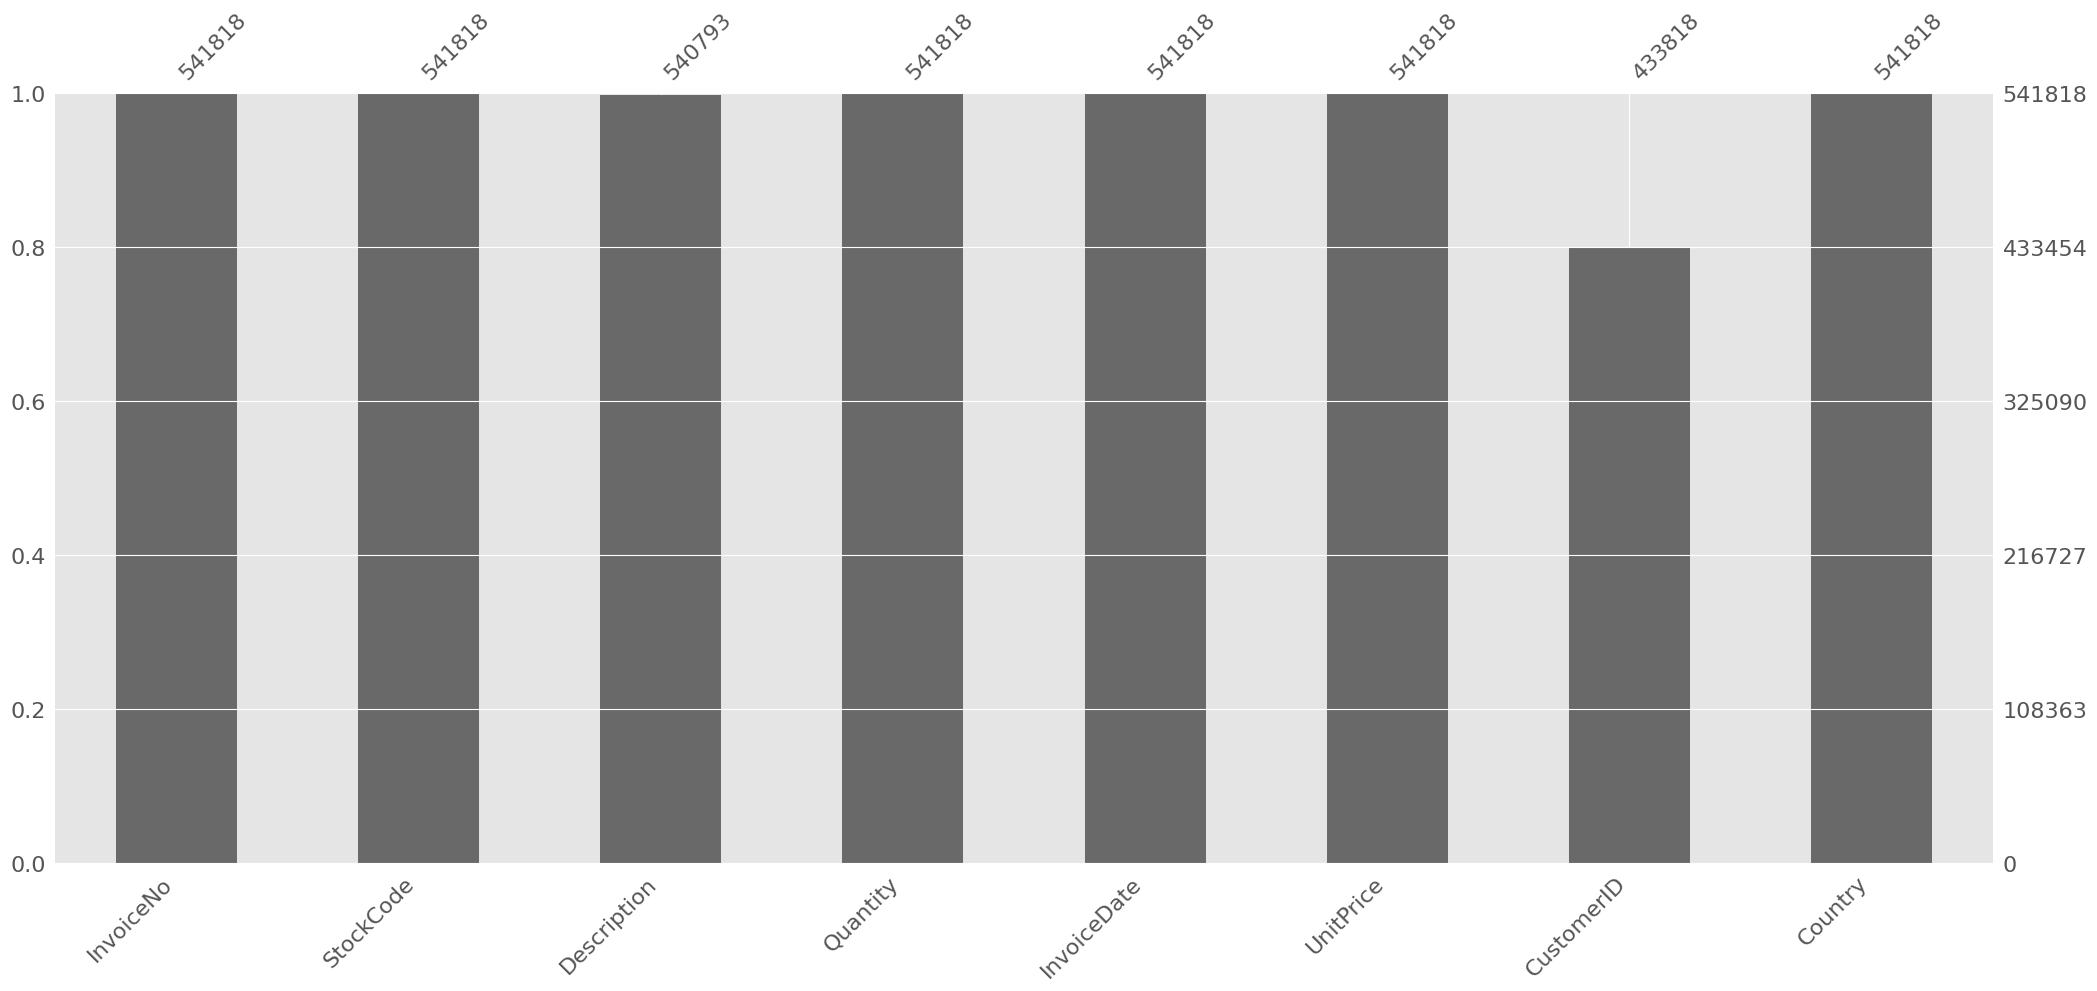

In [121]:
msno.bar(df)


COLUMN NAMES

In [122]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

FILLING NULL ROWS WITH MODE OF THE ROWS

In [123]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True, axis=0)


C:\Users\USER\AppData\Local\Temp\ipykernel_8424\3904500846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True, axis=0)


DROPPING INVOICE NO

In [124]:
df.drop(columns='InvoiceNo', inplace=True)


REPLACING UNWANTED CHARACTERS FROM ROWS

In [125]:
df['StockCode'] = df['StockCode'].str.replace('^', '')
df['StockCode'] = df['StockCode'].str.replace('ö', '')
df['StockCode'] = df['StockCode'].str.replace('A', '')
df['StockCode'] = df['StockCode'].str.replace('G', '')
df['StockCode'] = df['StockCode'].str.replace('E', '')
df['StockCode'] = df['StockCode'].str.replace('B', '')
df['Quantity'] = df['Quantity'].str.replace('@', '')
df['Description'] = df['Description'].str.replace('$', '')
df['UnitPrice'] = df['UnitPrice'].str.replace('Ww', '')
df['CustomerID'] = df['CustomerID'].str.replace('&', '')
df['CustomerID'] = df['CustomerID'].str.replace('#', '')
df['Country'] = df['Country'].str.replace('XxY', '')


REMOVING SMILEYS FROM COUNTRY COLUMN

In [126]:
import re
df['Country'] = df['Country'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


CONVERTING INVOICE DATE TO DATETIME FORMAT

In [127]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


GETTING THE TIME AND DATE COLUMNS

In [128]:
df['date'] = df['InvoiceDate'].dt.date
df['time'] = df['InvoiceDate'].dt.time
df['Year'] = df['InvoiceDate'].dt.year
df.drop(columns=['CustomerID', 'InvoiceDate'], inplace=True)


CONVERTING NUMERIC COLUMNS TO NUMERIC

In [129]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')



CONVERTING DATE TO DATETIME FORMAT

In [130]:
df['date'] = pd.to_datetime(df['date'])



In [131]:
df['Day'] = df['date'].dt.day
df['Day']


0         1
1         1
2         1
3         1
4         1
         ..
541904    9
541905    9
541906    9
541907    9
541908    9
Name: Day, Length: 541818, dtype: int32

STRIPPING MONTH NUMBER FROM DATE

In [132]:
df['month'] = df['date'].dt.month
df['month']


0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: month, Length: 541818, dtype: int32

In [133]:
def find_seasons(monthnumber):
    if monthnumber in [12, 1, 2]:
        return 'Winter'
    elif monthnumber in [3, 4, 5]:
        return 'Spring'
    elif monthnumber in [6, 7, 8]:
        return 'Summer'
    elif monthnumber in [9, 10, 11]:
        return 'Autumn'
    
df['Seasons'] = df['month'].apply(find_seasons)


In [134]:
df.drop(columns='date', inplace=True)


CONVERTING MONTHNUMBER TO MONTH NAME

In [135]:
df['month'] = pd.to_datetime(df['month'],format='%m').dt.month_name()


In [136]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 541818 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    517118 non-null  float64
 1   Description  541818 non-null  object 
 2   Quantity     541818 non-null  int64  
 3   UnitPrice    541818 non-null  float64
 4   Country      541818 non-null  object 
 5   time         541818 non-null  object 
 6   Year         541818 non-null  int32  
 7   Day          541818 non-null  int32  
 8   month        541818 non-null  object 
 9   Seasons      541818 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 41.3+ MB


RENAMING QUALITY AND DESCRIPTION COLUMNS

In [137]:
df_rename = {'Quantity':'Sales', 'Description':'Product'}
df.rename(df_rename, axis=1, inplace=True)


GETTING THE PRICE OF SALES COUNT IN A ROW

In [138]:
df['Price of sales'] = df['UnitPrice'] * df['Sales']


PERCENTAGE OF SALES TO COUNTRY

In [139]:
print('percentage of country\n{}'.format(df['Country'].value_counts() / len(df['Country'])*100))


percentage of country
Country
United Kingdom          91.430886
Germany                  1.752433
France                   1.579313
EIRE                     1.512501
Spain                    0.467500
Netherlands              0.437601
Belgium                  0.381863
Switzerland              0.369497
Portugal                 0.280352
Australia                0.232366
Norway                   0.200436
Italy                    0.148205
Channel Islands          0.139899
Finland                  0.128272
Cyprus                   0.114614
Sweden                   0.085268
Unspecified              0.082315
Austria                  0.074010
Denmark                  0.071795
Japan                    0.066074
Poland                   0.062936
Israel                   0.054815
USA                      0.053708
Hong Kong                0.053154
Singapore                0.042265
Iceland                  0.033591
Canada                   0.027869
Greece                   0.026946
Malta             

DROPPING NULL ROWS AFTER SOME CONVERSION

In [140]:

df.dropna(subset=['StockCode'], axis=0, inplace=True)
df.isnull().sum()


StockCode         0
Product           0
Sales             0
UnitPrice         0
Country           0
time              0
Year              0
Day               0
month             0
Seasons           0
Price of sales    0
dtype: int64

EXPLORATORY ANALYSIS

PRODUCT WITH HIGHEST SUM OF SALES TOP 20

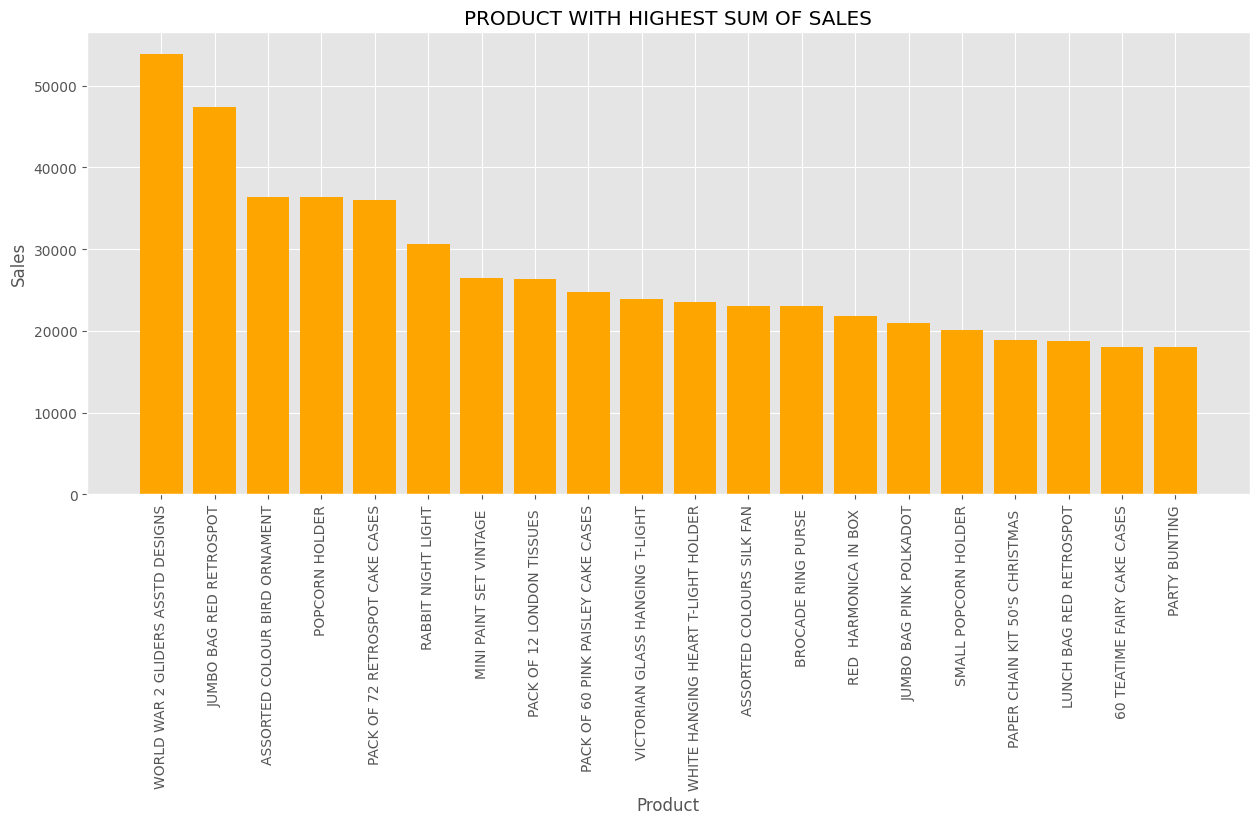

In [141]:
df_grouped_product = df.groupby('Product')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(15, 6))

plt.bar(df_grouped_product['Product'][:20], df_grouped_product['Sales'][:20], color='orange')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('PRODUCT WITH HIGHEST SUM OF SALES')
plt.show()


PRODUCT WITH HIGHEST NUMBER OF TIMES PRODUCT WAS SOLD(COUNT)

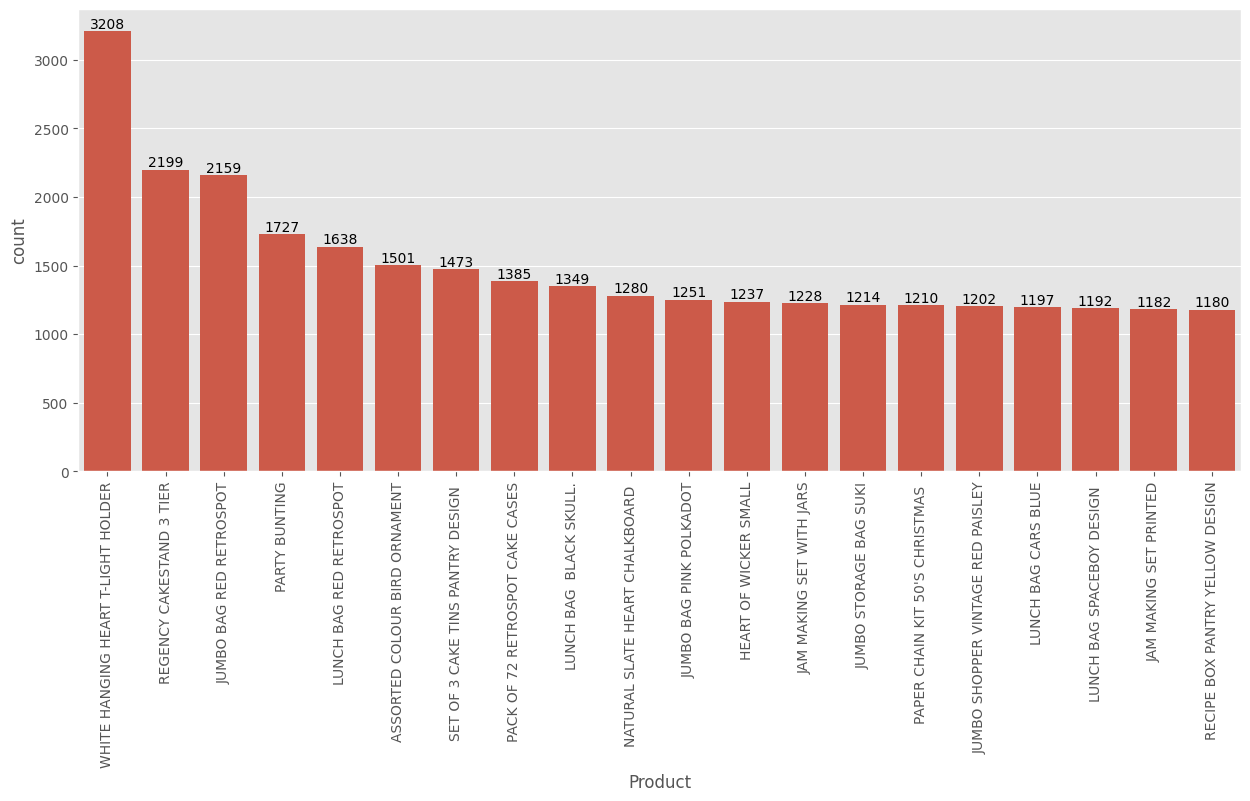

In [142]:
plt.figure(figsize=(15, 6))
graph = sns.countplot(x='Product', data = df, order = df.Product.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.show()


ALL SALES SUM MADE IN EACH MONTH

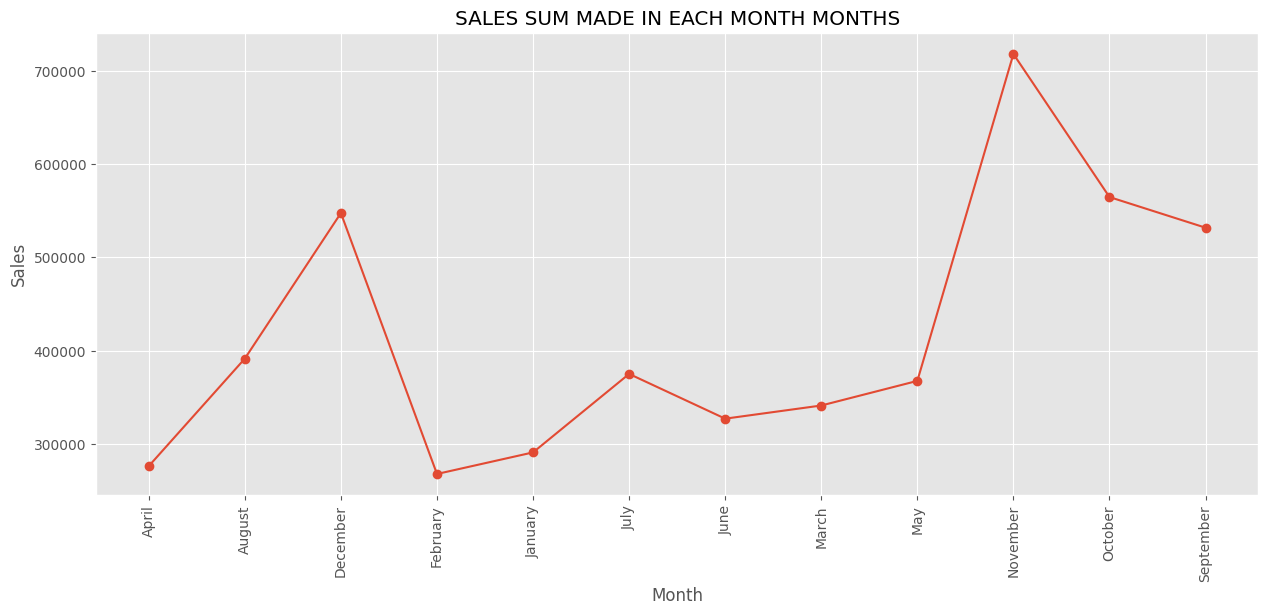

In [143]:
df_grouped = df.groupby('month')['Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
style.use('ggplot')
plt.plot(df_grouped['month'],df_grouped['Sales'], marker='o')
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('SALES SUM MADE IN EACH MONTH MONTHS')
plt.show()


USING COUNTPLOT SALES MADE IN EACH MONTH

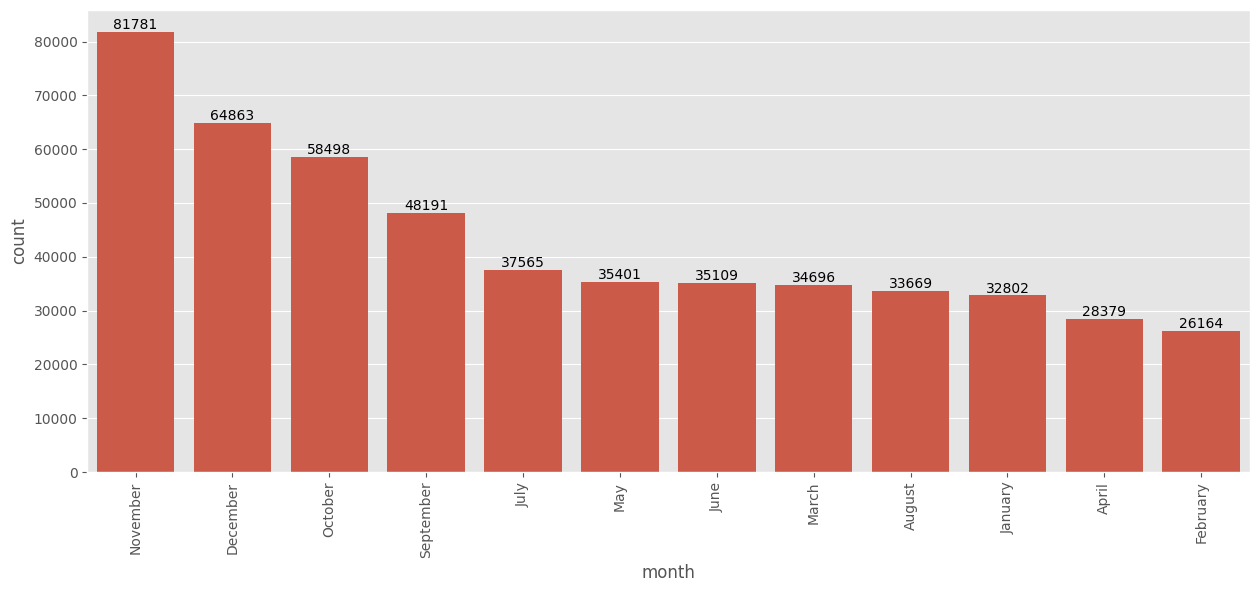

In [144]:
plt.figure(figsize=(15, 6))
graph = sns.countplot(x='month', data = df, order = df.month.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.show()


SUM OF ALL THE PRODUCT PURCHASED BY EACH COUNTRY

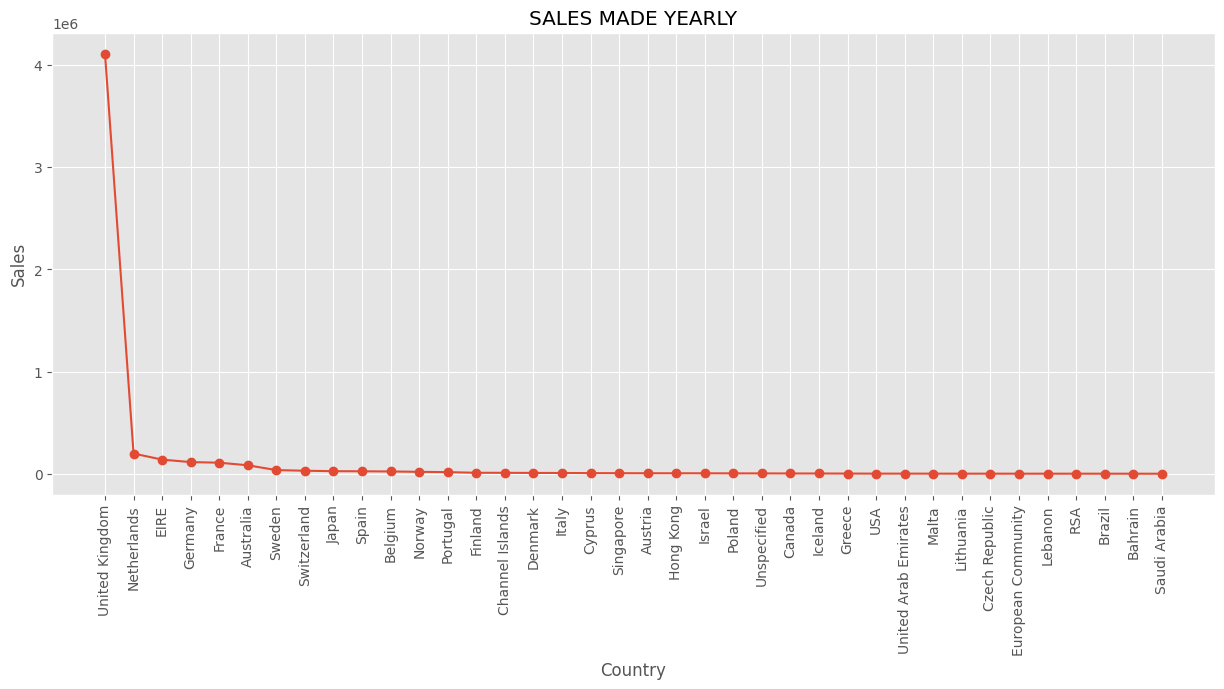

In [145]:
df_grouped_country = df.groupby('Country')['Sales'].sum().reset_index()
df_grouped_country =  df_grouped_country.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(15, 6))

plt.plot(df_grouped_country['Country'], df_grouped_country['Sales'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('SALES MADE YEARLY')
plt.show()


COUNTRIES THAT PURCHASED THE MOST

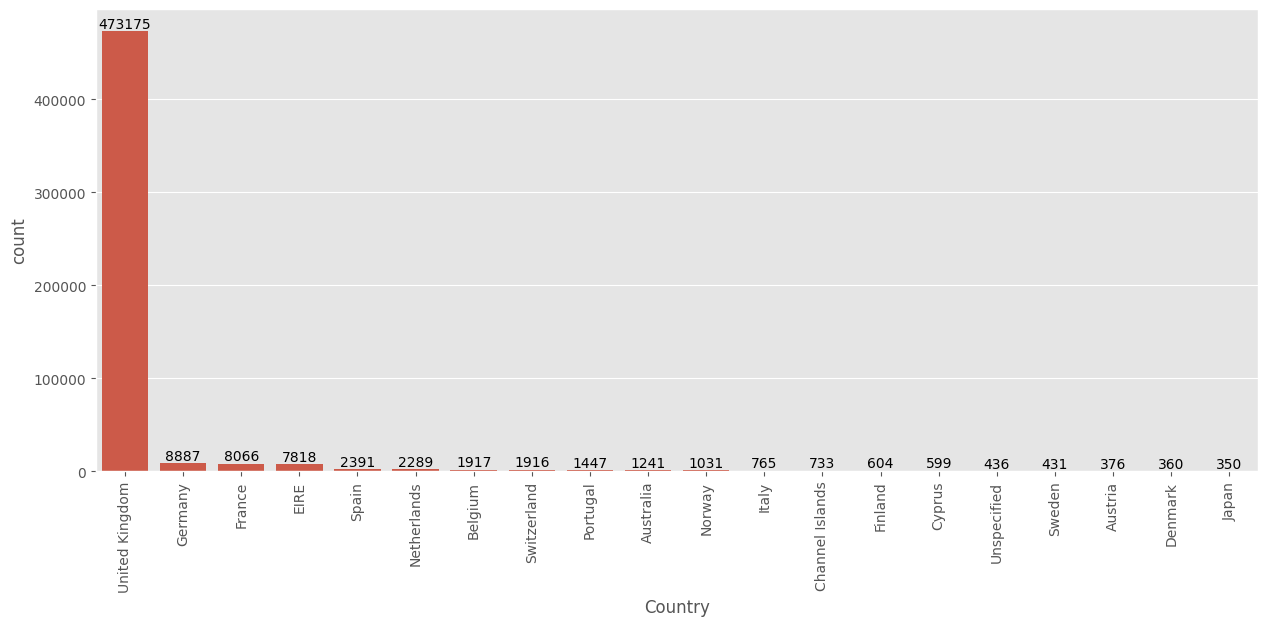

In [146]:
plt.figure(figsize=(15, 6))
graph = sns.countplot(x='Country', data = df, order = df.Country.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.show()


USING LINEPLOT SALES MADE IN EACH YEAR

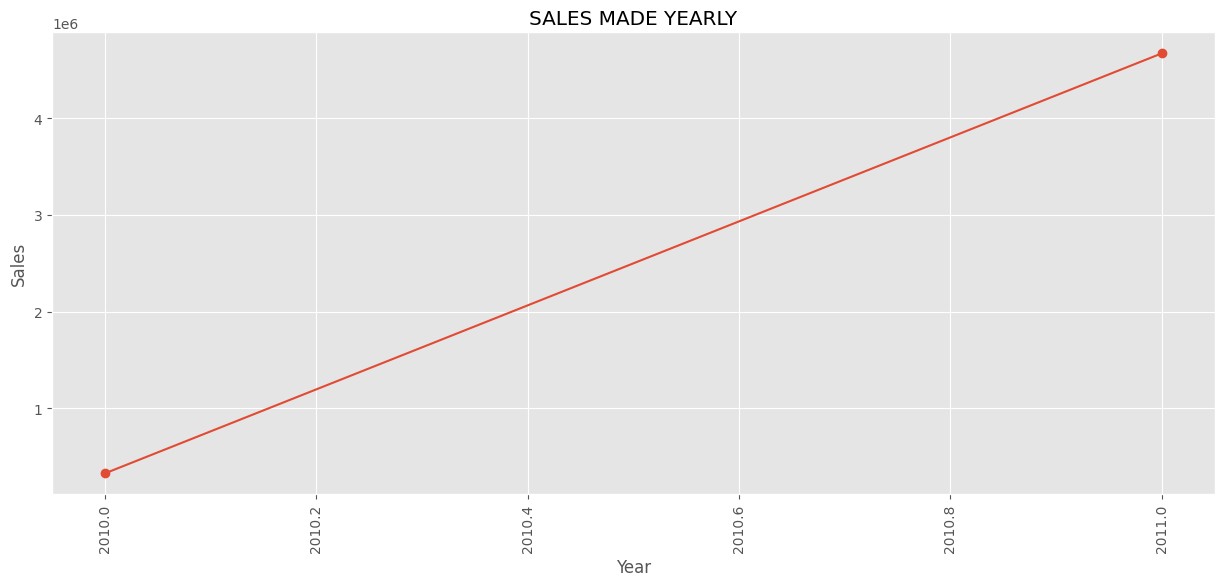

In [147]:
df_grouped_year = df.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(15, 6))

plt.plot(df_grouped_year['Year'], df_grouped_year['Sales'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('SALES MADE YEARLY')
plt.show()


USING COUNTPLOT SALES MADE IN EACH YEAR

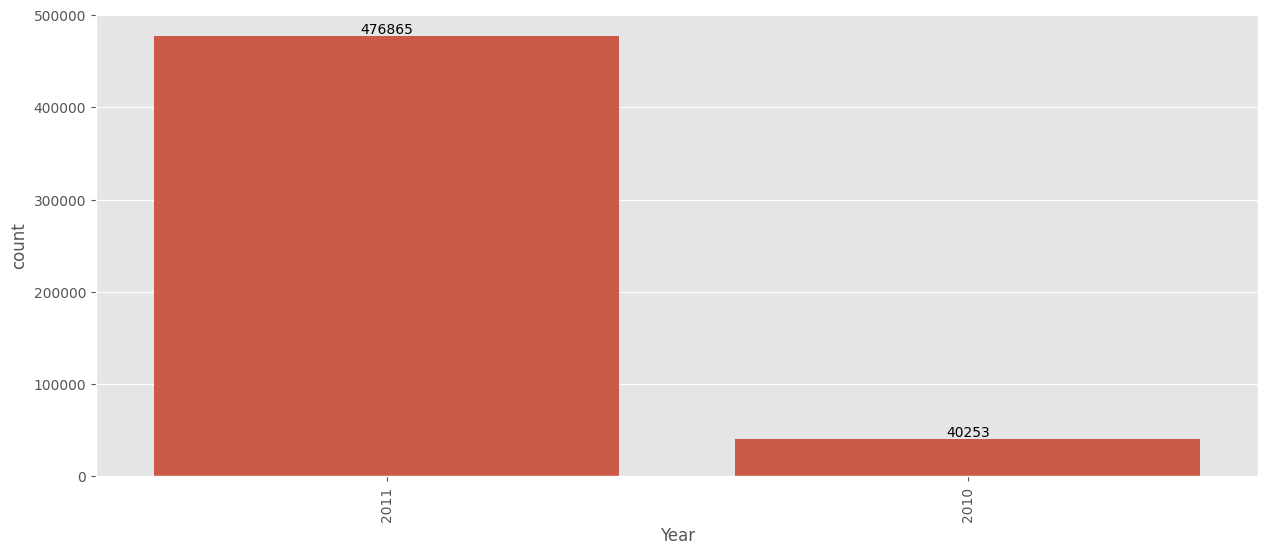

In [148]:
plt.figure(figsize=(15, 6))
graph = sns.countplot(x='Year', data = df, order = df.Year.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.show()


In [149]:
df['Sales'].value_counts()


Sales
 1        139584
 2         78290
 12        59486
 6         39332
 4         37068
           ...  
 1515          1
-204           1
-618           1
-472           1
-80995         1
Name: count, Length: 697, dtype: int64

TOTAL NUMBER OF MONEY THAT WAS MADE FROM SALES DURING EACH SEASON

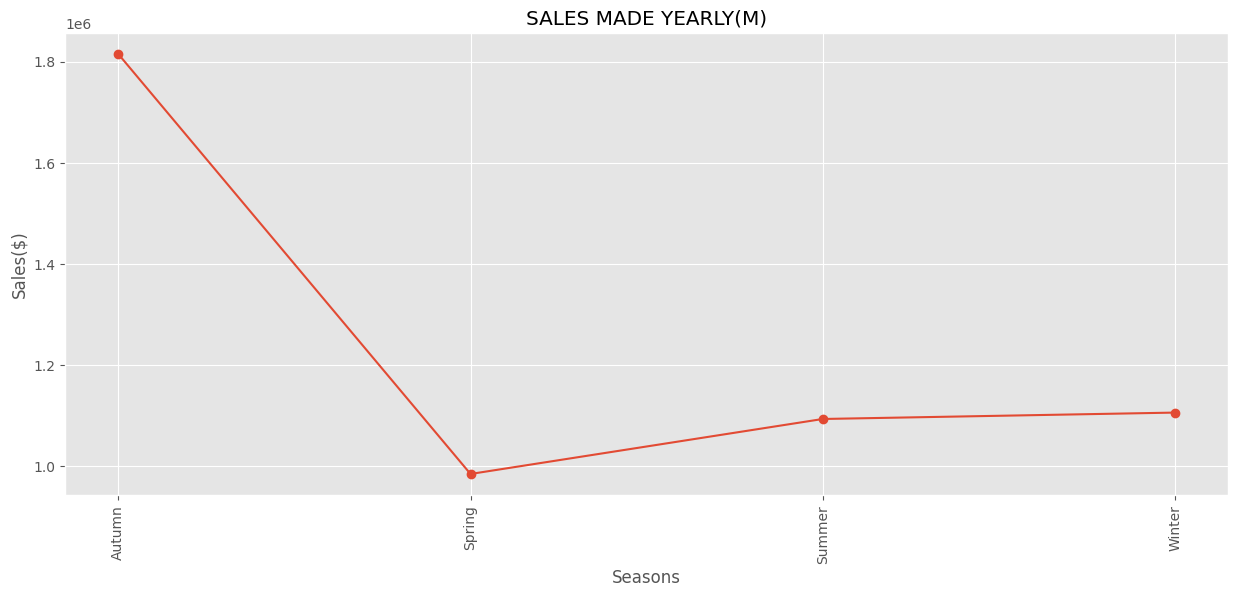

In [150]:
df_grouped_year = df.groupby('Seasons')['Sales'].sum().reset_index()
plt.figure(figsize=(15, 6))

plt.plot(df_grouped_year['Seasons'], df_grouped_year['Sales'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Seasons')
plt.ylabel('Sales($)')
plt.title('SALES MADE YEARLY(M)')
plt.show()


SALES MADE DURING EACH SEASONS(MORE SALES WERE MADE CLOSE TO DURING THE FESTIVE PERIOD)

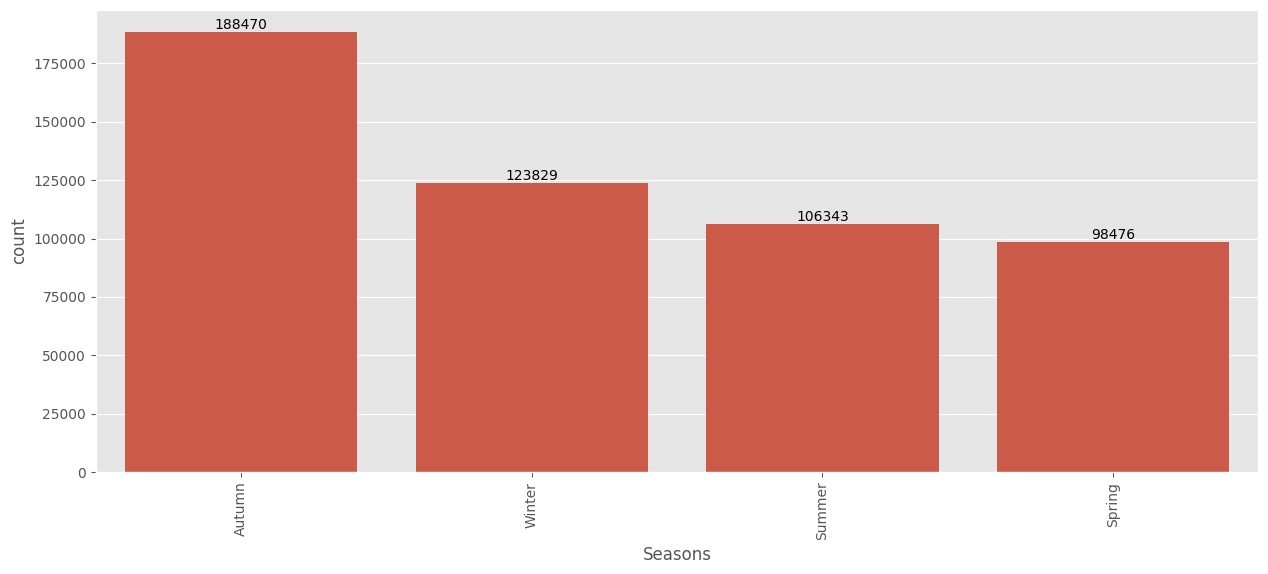

In [151]:
plt.figure(figsize=(15, 6))
graph = sns.countplot(x='Seasons', data = df, order = df.Seasons.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.show()


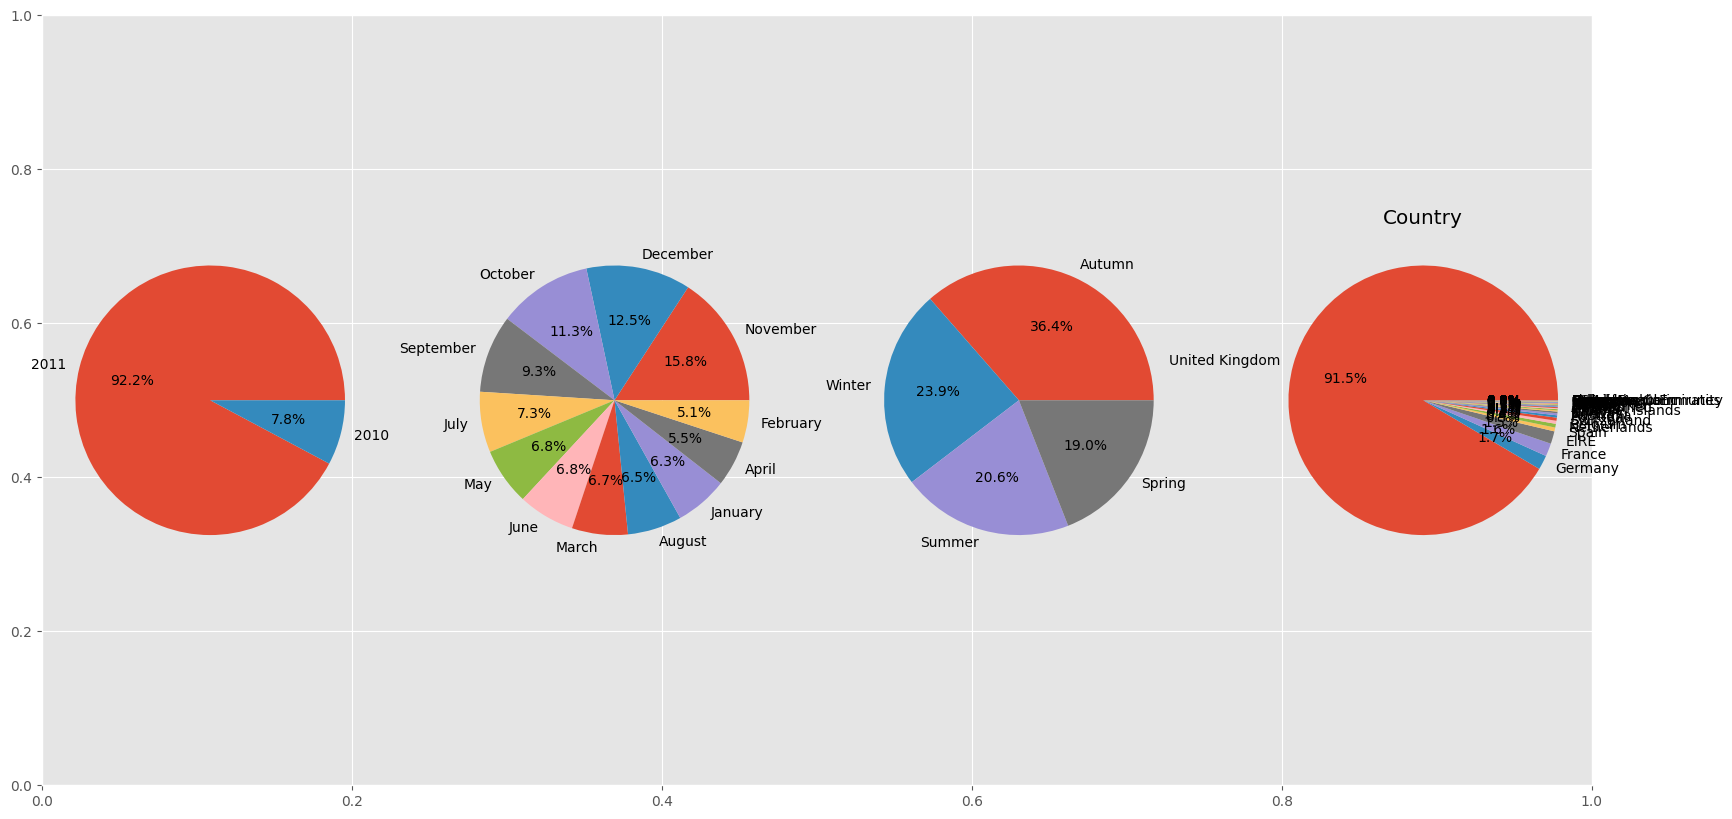

In [152]:
features = ['Year', 'month', 'Seasons', 'Country']

plt.subplots(figsize = (20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.title(col)
plt.show()


In [153]:
df.head()


,StockCode,Product,Sales,UnitPrice,Country,time,Year,Day,month,Seasons,Price of sales
0,85123.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,08:26:00,2010,1,December,Winter,15.30
1,71053.0,WHITE METAL LANTERN,6,3.39,United Kingdom,08:26:00,2010,1,December,Winter,20.34
2,84406.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,08:26:00,2010,1,December,Winter,22.00
3,84029.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,08:26:00,2010,1,December,Winter,20.34
4,84029.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,08:26:00,2010,1,December,Winter,20.34


VISUALIZING OUTLIERS

Text(0.5, 0.98, 'DATASET')

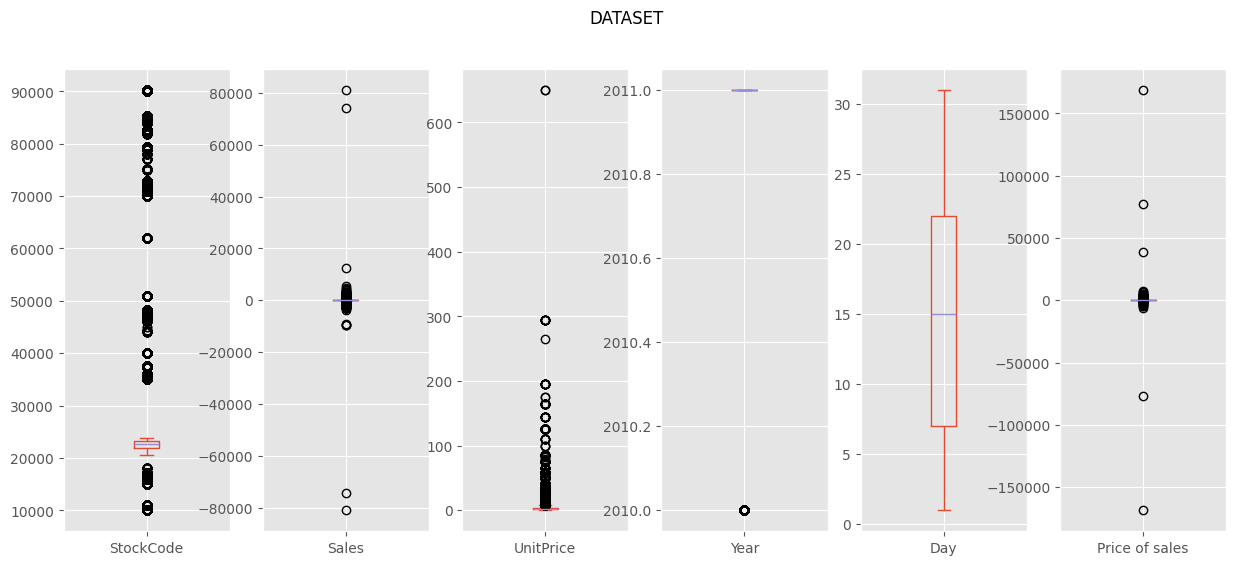

In [154]:

df.plot(kind = 'box',figsize = (15, 6),subplots = True, layout = (1, 6), sharex = False)
plt.suptitle('DATASET')


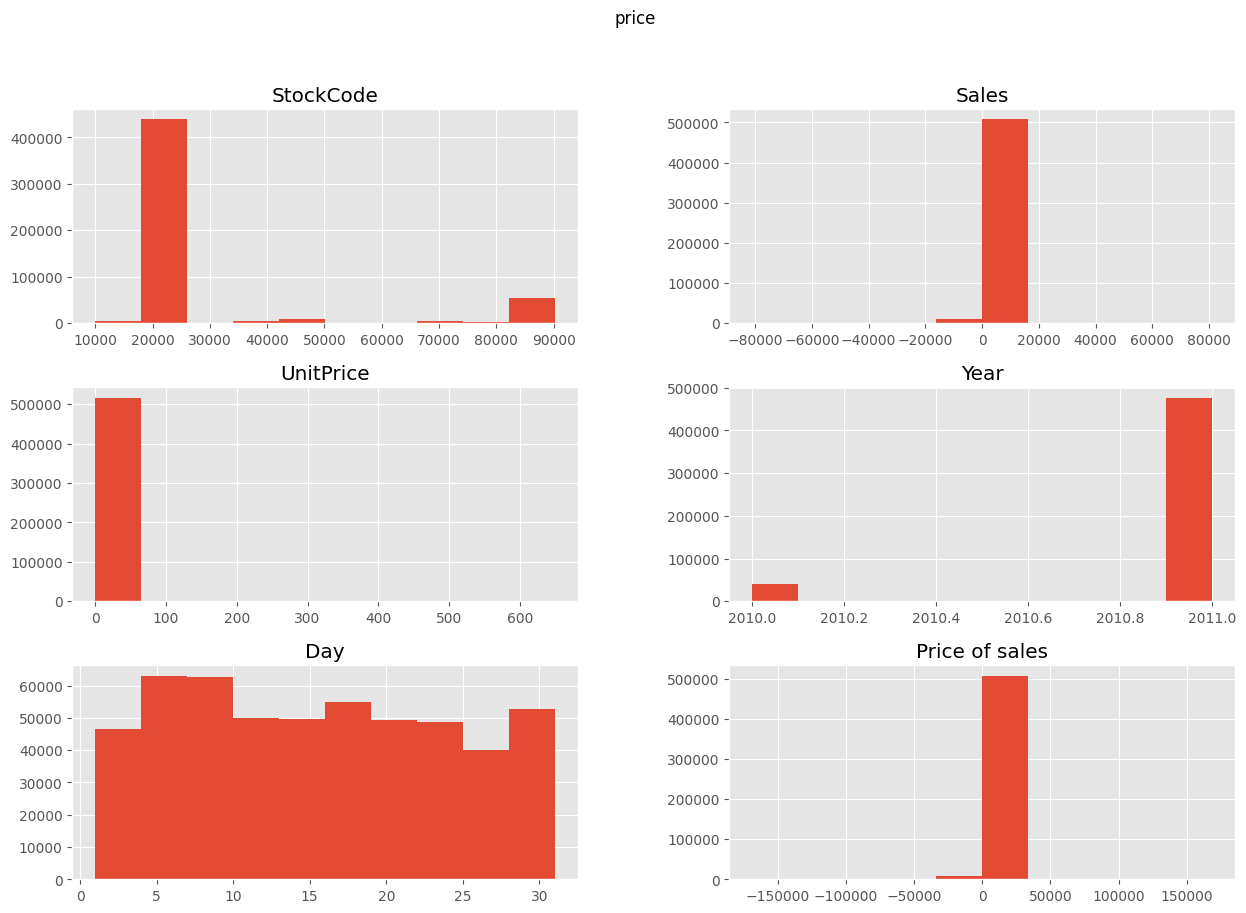

In [155]:

df.hist(figsize = (15, 10))
plt.suptitle('price')
plt.show()


REMOVING OF OUTLIERS

In [156]:
#for col in df.select_dtypes(include=['float64']).columns:
Q1 = df['Price of sales'].quantile(0.25)
Q3 = df['Price of sales'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('the shape of dataset before outlier removal :', df.shape)


13.919999999999998
the shape of dataset before outlier removal : (517118, 11)


the shape of dataset after removal (475361, 11)


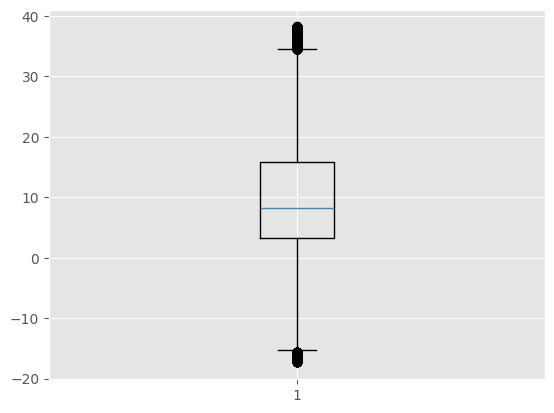

In [157]:
df = df[~((df['Price of sales'] < (Q1 - 1.5*IQR)) | (df['Price of sales'] > (Q3 + 1.5*IQR)))]
print('the shape of dataset after removal', df.shape)



plt.boxplot(df['Price of sales'])
plt.show()




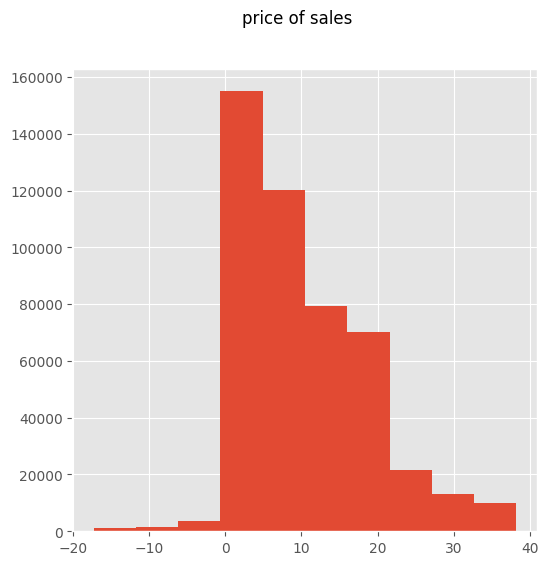

In [158]:

df['Price of sales'].hist(figsize = (6, 6))
plt.suptitle('price of sales')
plt.show()


In [159]:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('the shape of dataset before outlier removal :', df.shape)


2.88
the shape of dataset before outlier removal : (475361, 11)


the shape of dataset after removal (445079, 11)


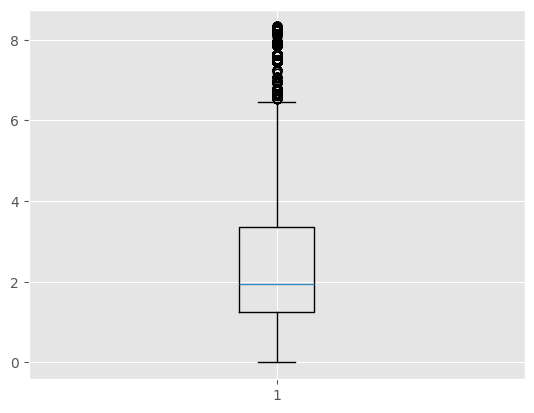

In [160]:
df = df[~((df['UnitPrice'] < (Q1 - 1.5*IQR)) | (df['UnitPrice'] > (Q3 + 1.5*IQR)))]
print('the shape of dataset after removal', df.shape)



plt.boxplot(df['UnitPrice'])
plt.show()


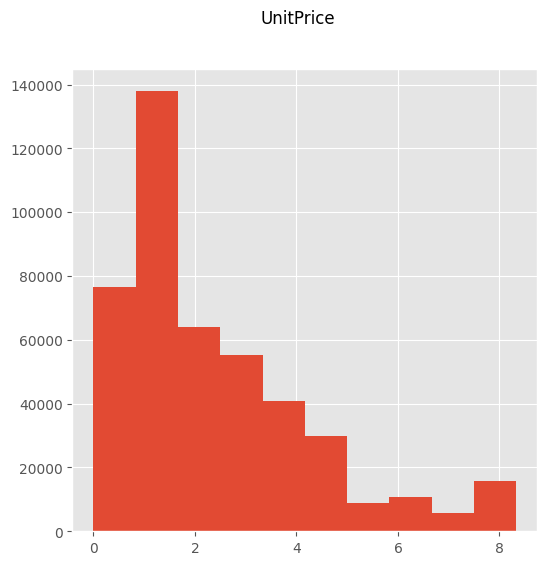

In [161]:

df['UnitPrice'].hist(figsize = (6, 6))
plt.suptitle('UnitPrice')
plt.show()


In [162]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('the shape of dataset before outlier removal :', df.shape)


9.0
the shape of dataset before outlier removal : (445079, 11)


the shape of dataset after removal (413419, 11)


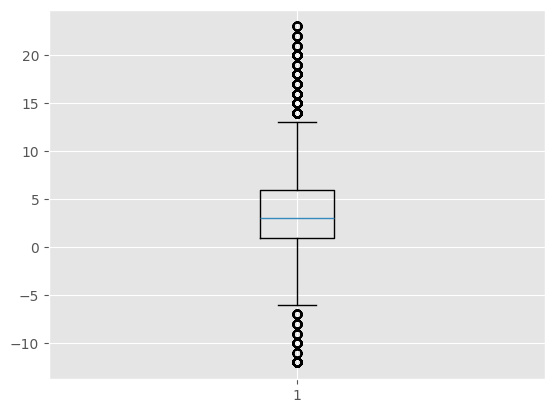

In [163]:
df = df[~((df['Sales'] < (Q1 - 1.5*IQR)) | (df['Sales'] > (Q3 + 1.5*IQR)))]
print('the shape of dataset after removal', df.shape)



plt.boxplot(df['Sales'])
plt.show()


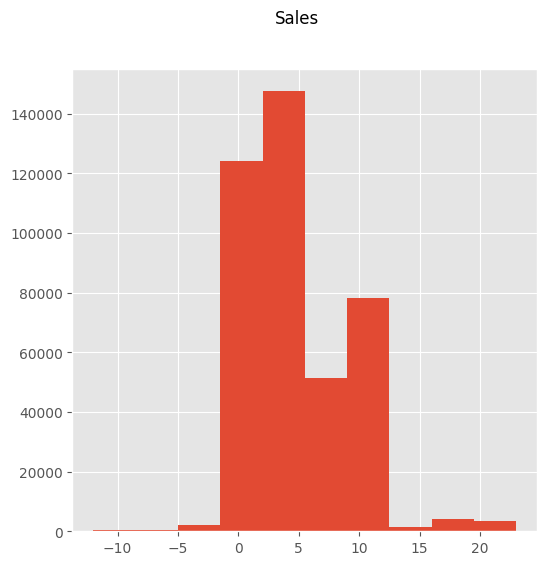

In [164]:

df['Sales'].hist(figsize = (6, 6))
plt.suptitle('Sales')
plt.show()


In [165]:
Q1 = df['StockCode'].quantile(0.25)
Q3 = df['StockCode'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('the shape of dataset before outlier removal :', df.shape)


1278.0
the shape of dataset before outlier removal : (413419, 11)


the shape of dataset after removal (351862, 11)


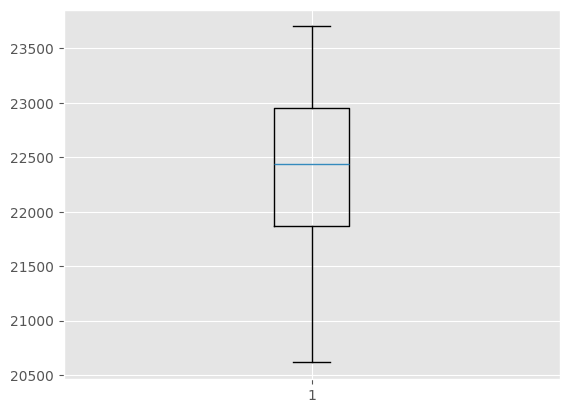

In [166]:
df = df[~((df['StockCode'] < (Q1 - 1.5*IQR)) | (df['StockCode'] > (Q3 + 1.5*IQR)))]
print('the shape of dataset after removal', df.shape)



plt.boxplot(df['StockCode'])
plt.show()


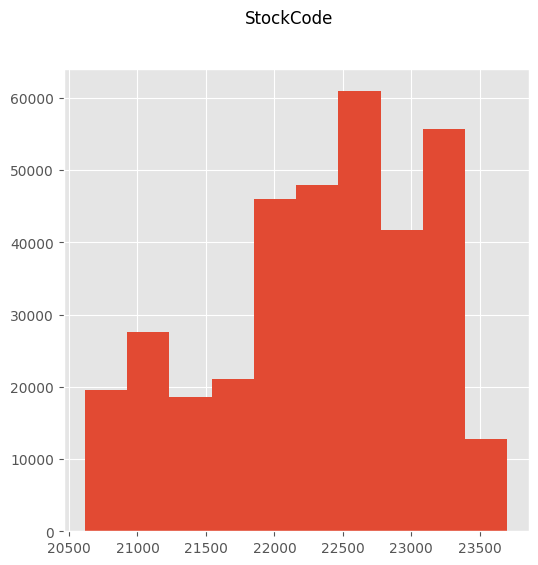

In [167]:

df['StockCode'].hist(figsize = (6, 6))
plt.suptitle('StockCode')
plt.show()


In [168]:
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('the shape of dataset before outlier removal :', df.shape)


0.0
the shape of dataset before outlier removal : (351862, 11)


the shape of dataset after removal (326297, 11)


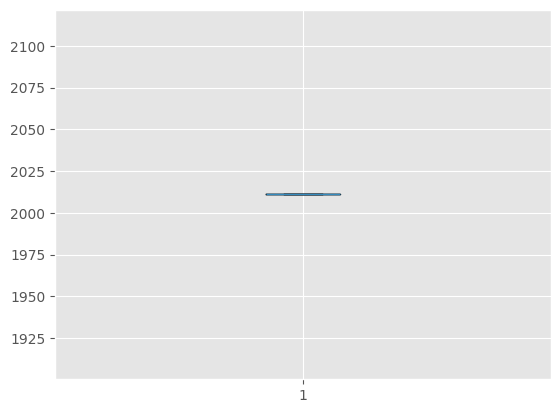

In [169]:
df = df[~((df['Year'] < (Q1 - 1.5*IQR)) | (df['Year'] > (Q3 + 1.5*IQR)))]
print('the shape of dataset after removal', df.shape)


plt.boxplot(df['Year'])
plt.show()


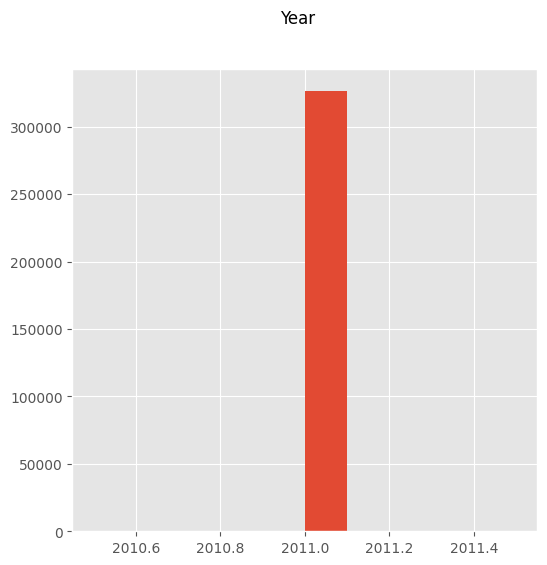

In [170]:

df['Year'].hist(figsize = (6, 6))
plt.suptitle('Year')
plt.show()


In [171]:
df[df['Sales']== -6]


,StockCode,Product,Sales,UnitPrice,Country,time,Year,Day,month,Seasons,Price of sales
44299,21412.0,VINTAGE GOLD TINSEL REEL,-6,0.42,EIRE,12:02:00,2011,5,January,Winter,-2.52
47474,22352.0,LUNCH BOX WITH CUTLERY RETROSPOT,-6,2.55,United Kingdom,10:56:00,2011,7,January,Winter,-15.30
52774,22659.0,LUNCH BOX I LOVE LONDON,-6,1.95,United Kingdom,13:09:00,2011,11,January,Winter,-11.70
53579,22198.0,LARGE POPCORN HOLDER,-6,1.65,United Kingdom,17:35:00,2011,11,January,Winter,-9.90
56212,22700.0,BLACK AND WHITE DOG BOWL,-6,0.85,United Kingdom,12:56:00,2011,13,January,Winter,-5.10
...,...,...,...,...,...,...,...,...,...,...,...
527352,23661.0,MILK MAIDS MUG,-6,1.65,United Kingdom,16:32:00,2011,5,December,Winter,-9.90
529700,22795.0,SWEETHEART RECIPE BOOK STAND,-6,0.70,United Kingdom,09:49:00,2011,6,December,Winter,-4.20
531357,23408.0,PHOTO FRAME LINEN AND LACE SMALL,-6,2.08,United Kingdom,14:07:00,2011,6,December,Winter,-12.48
531408,22276.0,WASH BAG VINTAGE ROSE PAISLEY,-6,2.55,United Kingdom,14:19:00,2011,6,December,Winter,-15.30


REMOVING NAN VALUES FROM PRODUCT COLUMN

In [172]:
for x in df.index:
    if df.loc[x, 'Product'] == 'nan':
     df.drop(x, inplace=True)


REMOVING NEGATIVE VALUES FROM SALES COLUMN

In [173]:
df['Sales'] = df['Sales'].replace(-1, '')
df['Sales'] = df['Sales'].replace(-2, '')
df['Sales'] = df['Sales'].replace(-3, '')
df['Sales'] = df['Sales'].replace(-4, '')
df['Sales'] = df['Sales'].replace(-5, '')
df['Sales'] = df['Sales'].replace(-6, '')
df['Sales'] = df['Sales'].replace(-7, '')
df['Sales'] = df['Sales'].replace(-8, '')
df['Sales'] = df['Sales'].replace(-9, '')
df['Sales'] = df['Sales'].replace(-10, '')
df['Sales'] = df['Sales'].replace(-11, '')


REMOVING THE NAN VALUES

In [174]:
for x in df.index:
    if df.loc[x, 'Sales'] == 'NaN':
     df.drop(x, inplace=True)


REMOVING THE BLANK SALES ROWS

In [175]:
for x in df.index:
    if df.loc[x, 'Sales'] == '':
     df.drop(x, inplace=True)


SHOWCASING A BALANCED DATA AFTER REMOVING OUTLIERS 

array([[<Axes: title={'center': 'StockCode'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Price of sales'}>, <Axes: >]],
      dtype=object)

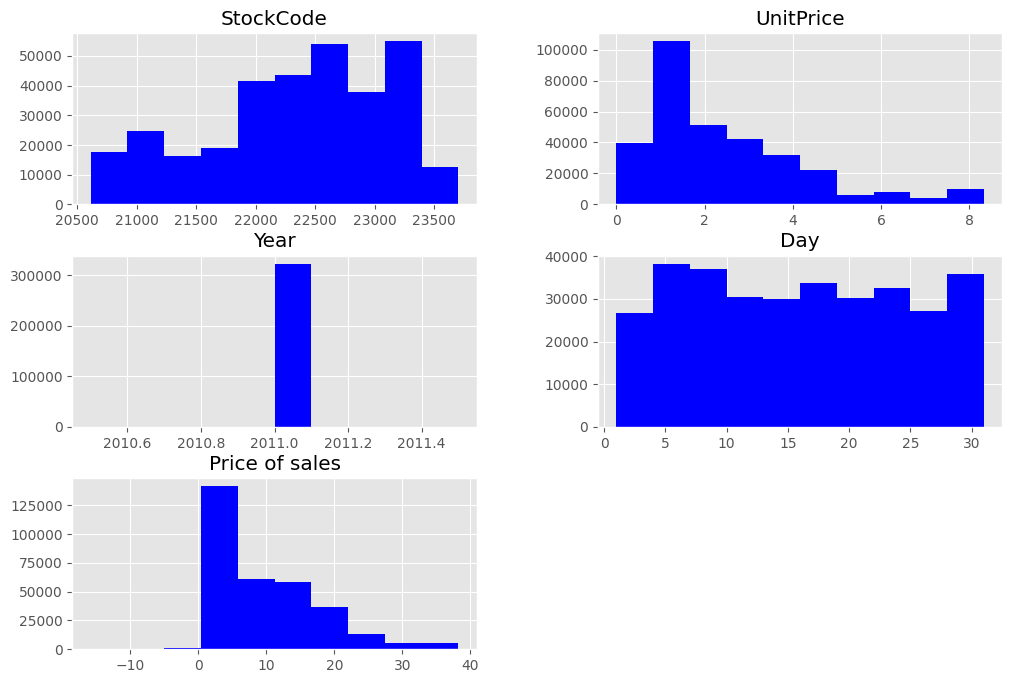

In [177]:
df.hist(figsize=(12, 8), bins=10, color='blue')
